**Load Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**Data Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [6]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1,'Yes': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 0, 'No': 1,'Yes': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1,'Two year': 2})

In [7]:
df = pd.get_dummies(df, columns=['InternetService'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True, dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [8]:
df.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7043.00        7043.00  7043.00     7043.00 7043.00       7043.00   
mean     0.50           0.16     0.48        0.30   32.37          0.90   
std      0.50           0.37     0.50        0.46   24.56          0.30   
min      0.00           0.00     0.00        0.00    0.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
count        7043.00         7043.00       7043.00           7043.00  ...   
mean            1.33            1.07          1.13              1.13  ...   
std             0.64            0.71          0.74              0.74  ...   
min             0.00            0.00          0.00              0.00  ...   
25%             1.00            1.00          1.00              1.00  ...   
50%             1.00            1.00          1.00              1.00  ...   
75%             2.00            2.00          2.00              2.00  ...   
max             2.00            2.00          2.00              2.00  ...   

       Contract  PaperlessBilling  MonthlyCharges  TotalCharges   Churn  \
count   7043.00           7043.00         7043.00       7043.00 7043.00   
mean       0.69              0.59           64.76       2281.92    0.27   
std        0.83              0.49           30.09       2265.27    0.44   
min        0.00              0.00           18.25         18.80    0.00   
25%        0.00              0.00           35.50        402.23    0.00   
50%        0.00              1.00           70.35       1397.47    0.00   
75%        1.00              1.00           89.85       3786.60    1.00   
max        2.00              1.00          118.75       8684.80    1.00   

       InternetService_Fiber optic  InternetService_No  \
count                      7043.00             7043.00   
mean                          0.44                0.22   
std                           0.50                0.41   
min                           0.00                0.00   
25%                           0.00                0.00   
50%                           0.00                0.00   
75%                           1.00                0.00   
max                           1.00                1.00   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                                7043.00                         7043.00   
mean                                    0.22                            0.34   
std                                     0.41                            0.47   
min                                     0.00                            0.00   
25%                                     0.00                            0.00   
50%                                     0.00                            0.00   
75%                                     0.00                            1.00   
max                                     1.00                            1.00   

       PaymentMethod_Mailed check  
count                     7043.00  
mean                         0.23  
std                          0.42  
min                          0.00  
25%                          0.00  
50%                          0.00  
75%                          0.00  
max                          1.00  

[8 rows x 23 columns]

In [9]:
df.drop(['customerID'], axis=1, inplace=True)
df.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.00
InternetService_Fiber optic              0.31
PaymentMethod_Electronic check           0.30
MonthlyCharges                           0.19
PaperlessBilling                         0.19
StreamingTV                              0.16
StreamingMovies                          0.16
SeniorCitizen                            0.15
DeviceProtection                         0.08
OnlineBackup                             0.07
MultipleLines                            0.04
TechSupport                              0.03
OnlineSecurity                           0.02
PhoneService                             0.01
gender                                  -0.01
PaymentMethod_Mailed check              -0.09
PaymentMethod_Credit card (automatic)   -0.13
Partner                                 -0.15
Dependents                              -0.16
TotalCharges                            -0.20
InternetService_No                      -0.23
tenure                            

**EDA**

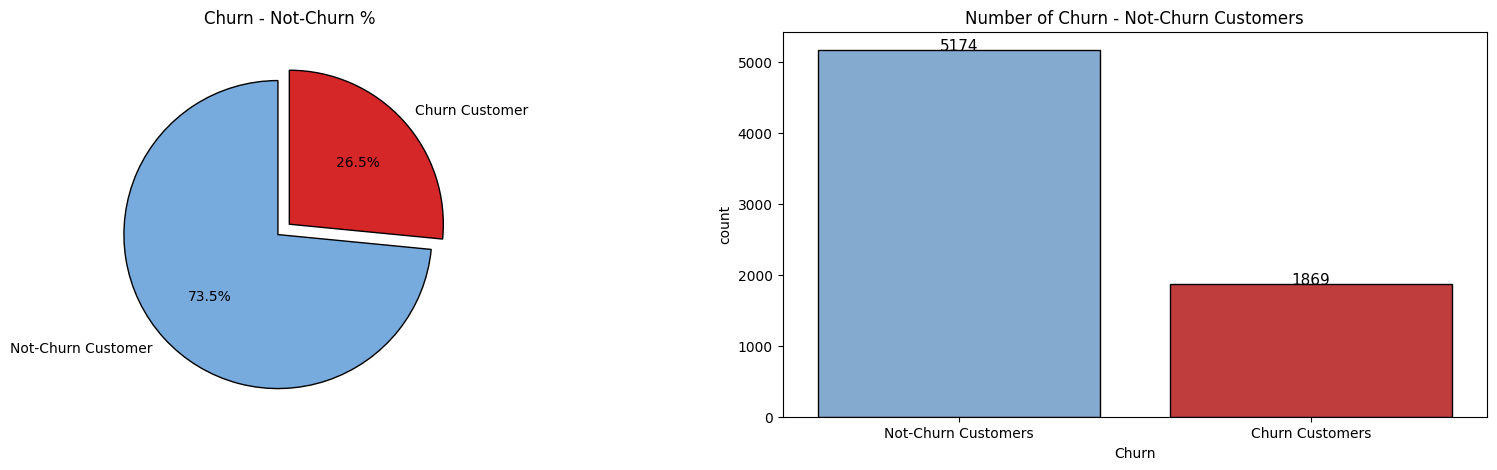

In [10]:
colors=['#77aadd','#d62728']
l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %')

plt.subplot(1,2,2)
ax = sns.countplot(x='Churn',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers')
plt.show()

Clearly we can see that this is an imbalanced dataset as not churn customers are nearly thrice of churn cunstomer. Due to which, predictions will be biased towards not-churn customers.

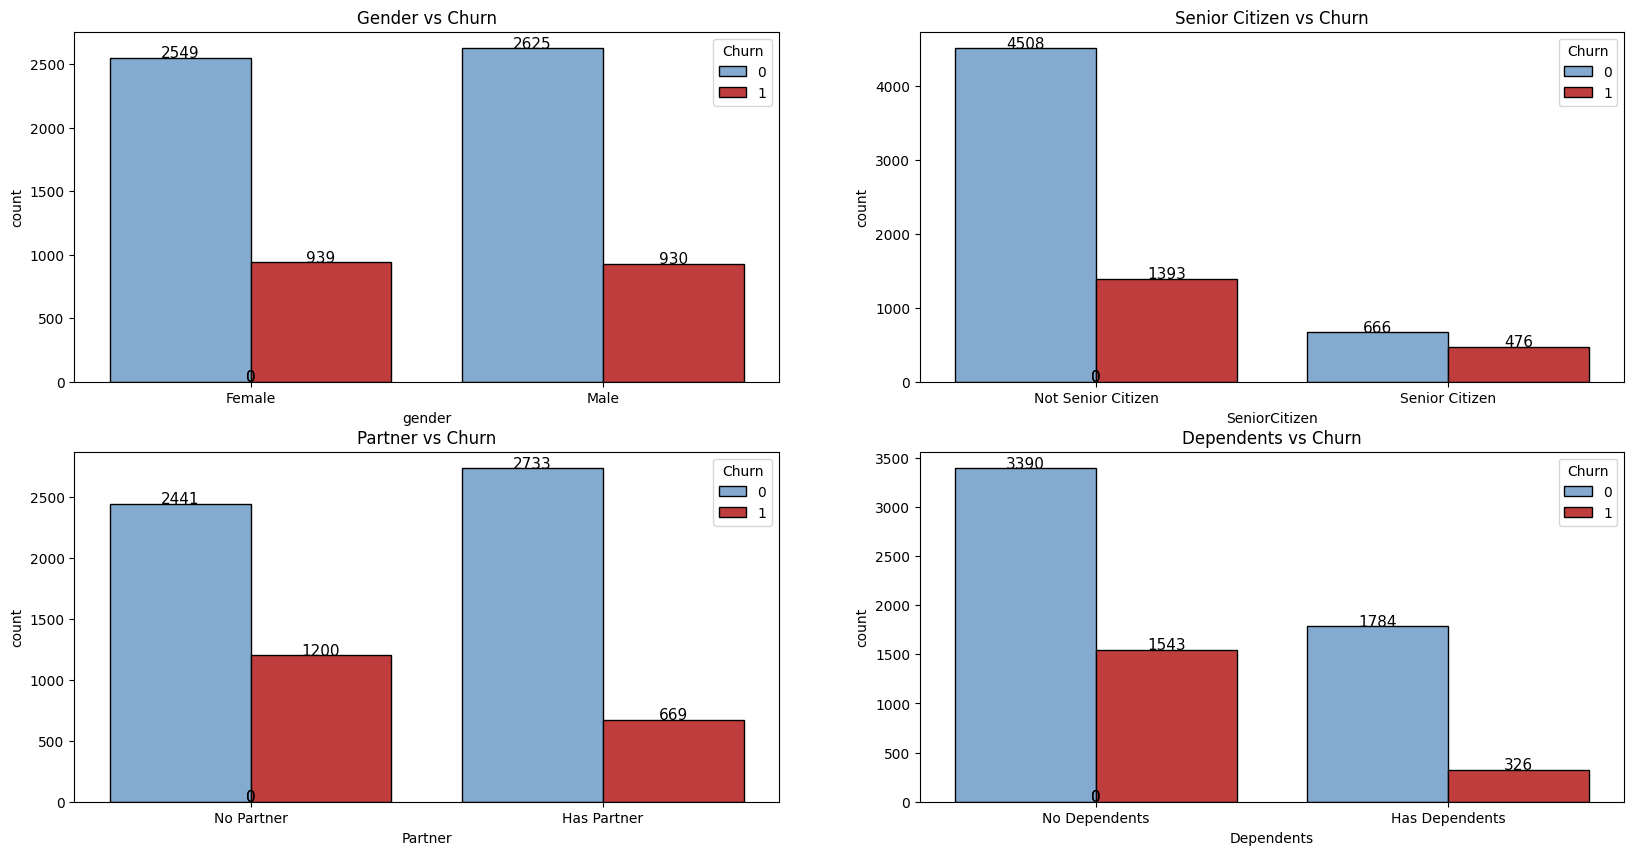

In [11]:
fig=plt.subplots(nrows = 2,ncols = 2,figsize = (20,10))
plt.subplot(2,2,1)
ax = sns.countplot(x='gender',hue='Churn',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Female','Male'])
plt.title('Gender vs Churn')    
plt.subplot(2,2,2)
ax = sns.countplot(x='SeniorCitizen',hue='Churn',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not Senior Citizen','Senior Citizen'])
plt.title('Senior Citizen vs Churn')    
plt.subplot(2,2,3)
ax = sns.countplot(x='Partner',hue='Churn',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Partner','Has Partner'])    
plt.title('Partner vs Churn')
plt.subplot(2,2,4)
ax = sns.countplot(x='Dependents',hue='Churn',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Dependents','Has Dependents'])    
plt.title('Dependents vs Churn')
plt.show()

1. Customer churning for male & female customers is very similar to each other!
2. We have very low numbers of senior citizens and out of them nearly 40% churns.
3. Customers housing with a partner churned less as compared to those not living with partners.
4. Customers having no dependents churned more!!

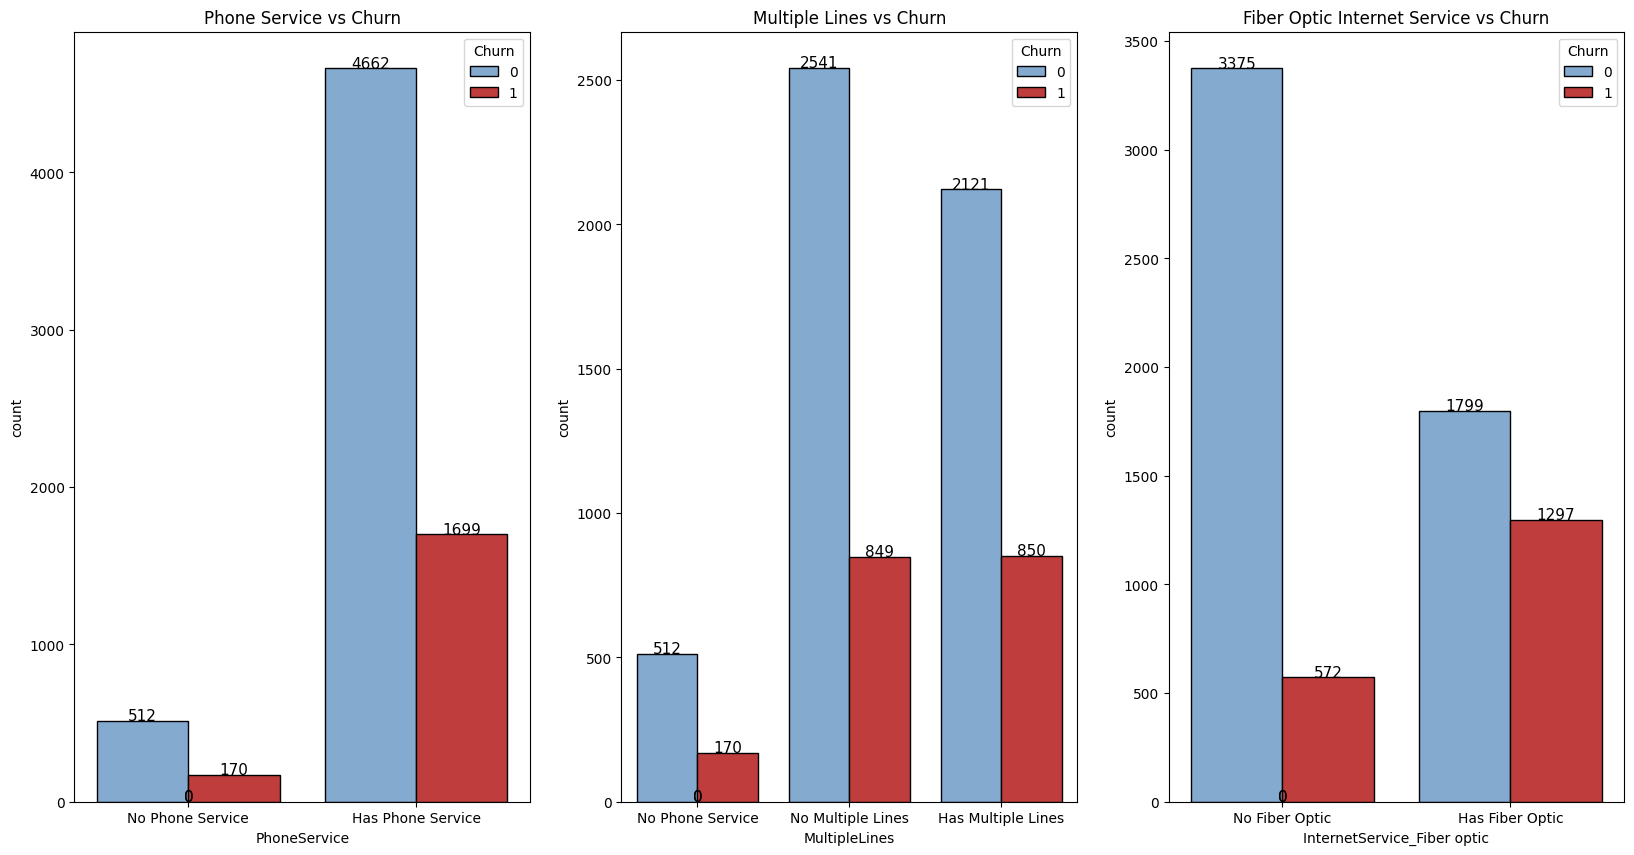

In [12]:
fig=plt.subplots(nrows = 1,ncols = 3,figsize = (20,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='PhoneService',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Phone Service','Has Phone Service'])
plt.title('Phone Service vs Churn')    
plt.subplot(1,3,2)
ax = sns.countplot(x='MultipleLines',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Phone Service','No Multiple Lines','Has Multiple Lines'])
plt.title('Multiple Lines vs Churn')    
plt.subplot(1,3,3)
ax = sns.countplot(x='InternetService_Fiber optic',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fiber Optic','Has Fiber Optic'])
plt.title('Fiber Optic Internet Service vs Churn')
plt.show()

1. Despite no phone services more customers retained as compared to churned.
2. In case of multiple lines, similar churn rate if multiple lines are present or not.
3. Customers having fiber optic tend to churn more as compared to those does not having fiber optic.

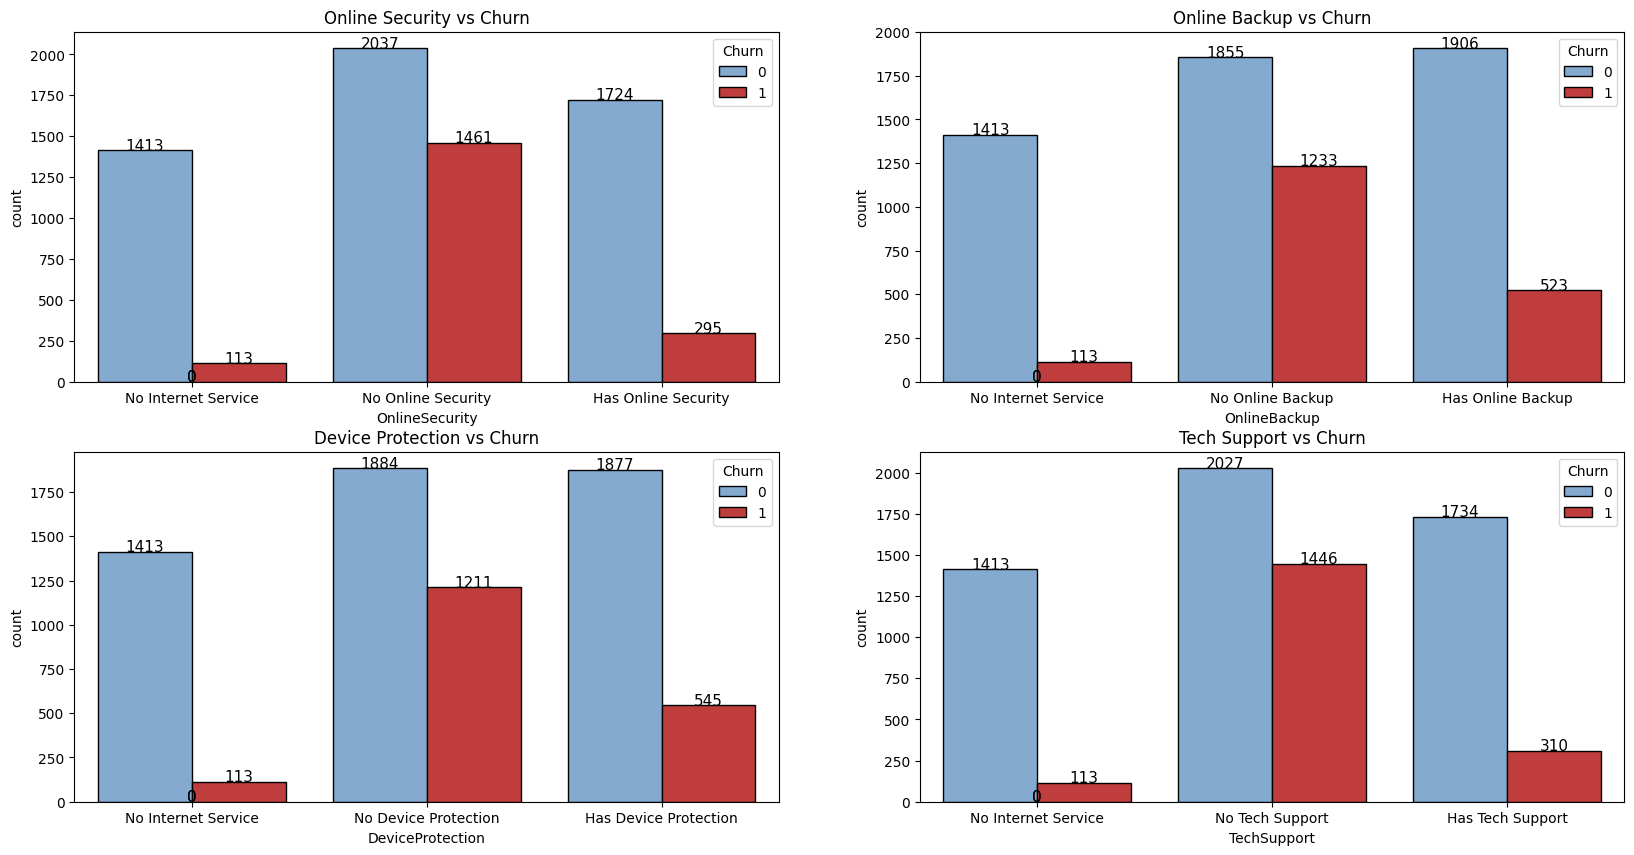

In [13]:
fig=plt.subplots(nrows = 2,ncols = 2,figsize = (20,10))
plt.subplot(2,2,1)
ax = sns.countplot(x='OnlineSecurity',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Internet Service','No Online Security','Has Online Security'])
plt.title('Online Security vs Churn')    
plt.subplot(2,2,2)
ax = sns.countplot(x='OnlineBackup',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Internet Service','No Online Backup','Has Online Backup'])
plt.title('Online Backup vs Churn')    
plt.subplot(2,2,3)
ax = sns.countplot(x='DeviceProtection',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Internet Service','No Device Protection','Has Device Protection'])
plt.title('Device Protection vs Churn')    
plt.subplot(2,2,4)
ax = sns.countplot(x='TechSupport',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Internet Service','No Tech Support','Has Tech Support'])    
plt.title('Tech Support vs Churn')
plt.show()

1. Customers having no online security tend to churn more!!!
2. Customers without online back churned more.
3. Customers without device protection churned more as compared to those having device protection.
4. Customers without tech support churned more.

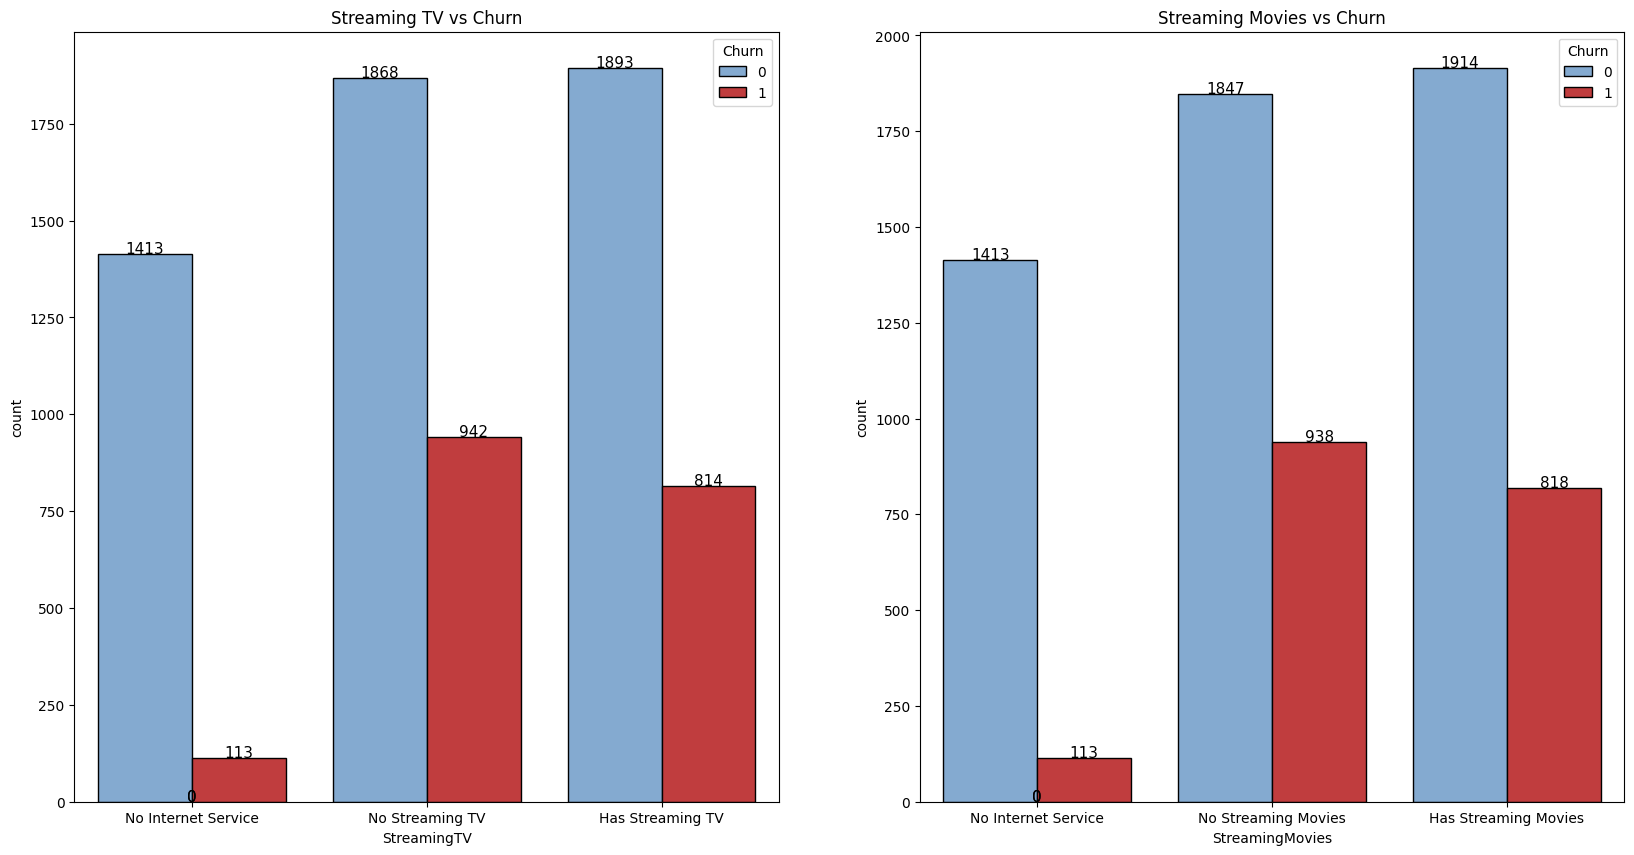

In [14]:
fig=plt.subplots(nrows = 1,ncols = 2,figsize = (20,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='StreamingTV',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)    
ax.set_xticklabels(['No Internet Service','No Streaming TV','Has Streaming TV'])
plt.title('Streaming TV vs Churn')    
plt.subplot(1,2,2)
ax = sns.countplot(x='StreamingMovies',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)    
ax.set_xticklabels(['No Internet Service','No Streaming Movies','Has Streaming Movies'])
plt.title('Streaming Movies vs Churn')
plt.show()

Both have an approximately identical plots suggesting despite of being subscribed to streaming TV and streaming movies a lot of customers churned!!

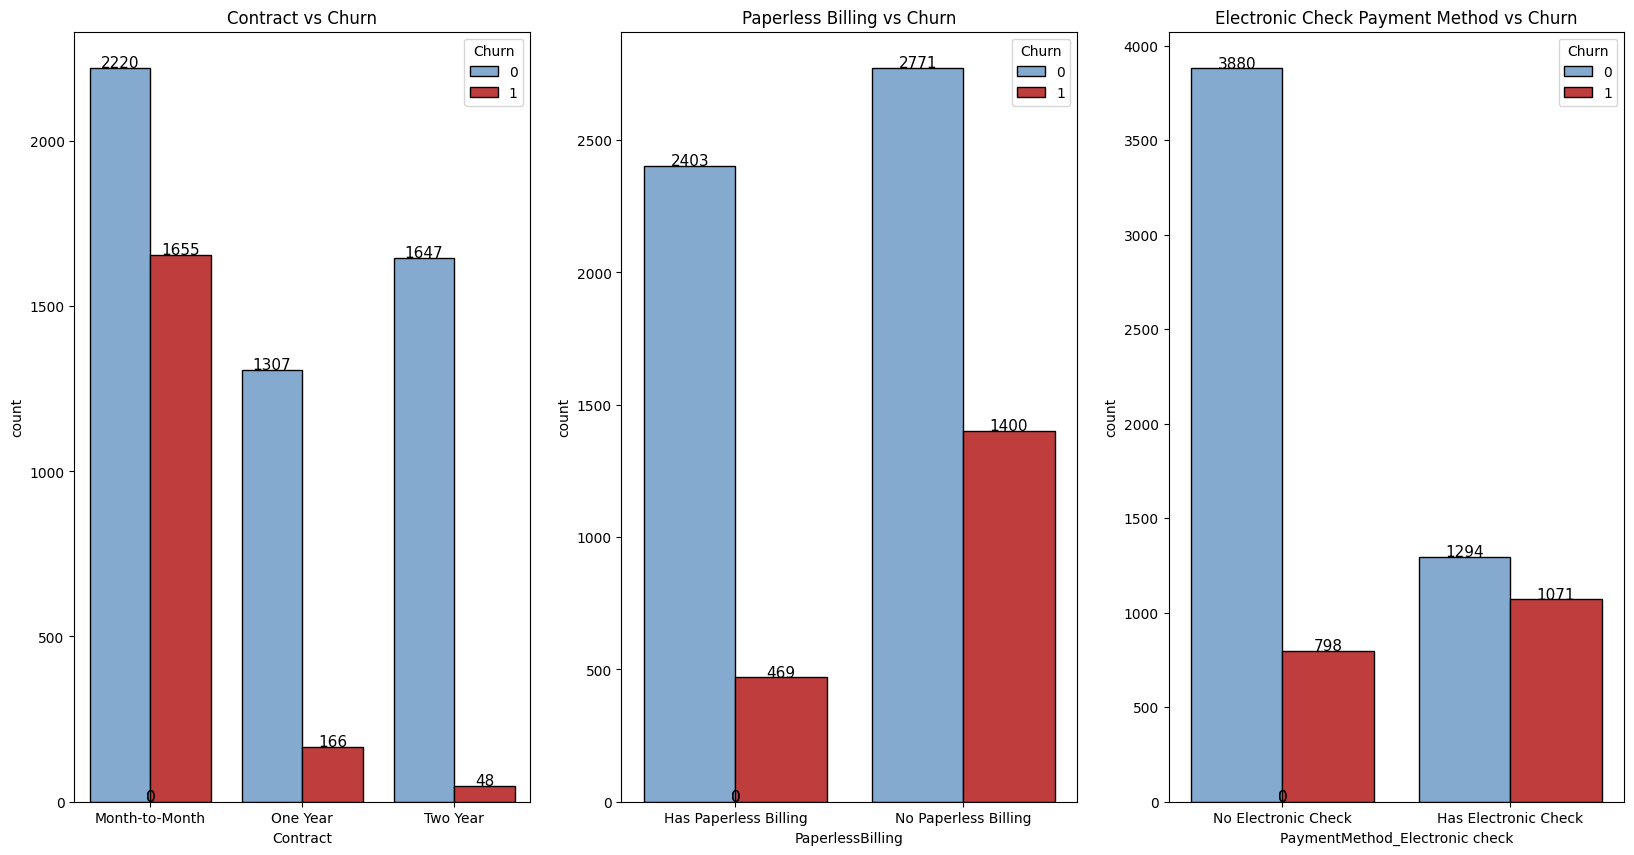

In [15]:
fig=plt.subplots(nrows = 1,ncols = 3,figsize = (20,10))
plt.subplot(1,3,1)
ax = sns.countplot(x='Contract',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Month-to-Month','One Year','Two Year'])
plt.title('Contract vs Churn')    
plt.subplot(1,3,2)
ax = sns.countplot(x='PaperlessBilling',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Has Paperless Billing','No Paperless Billing'])
plt.title('Paperless Billing vs Churn')    
plt.subplot(1,3,3)
ax = sns.countplot(x='PaymentMethod_Electronic check',hue='Churn',data = df,palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Electronic Check','Has Electronic Check'])
plt.title('Electronic Check Payment Method vs Churn')
plt.show()

1. Customers having month-to-month contract are more likely to churn.
2. Paperless billing displays a high numbers of customers being churned out. This is probably due to some payment issue or reciept issues.
3. Customers clearly resented the Electronic check PaymentMethod. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

**Categorical features v/s Churn cases**

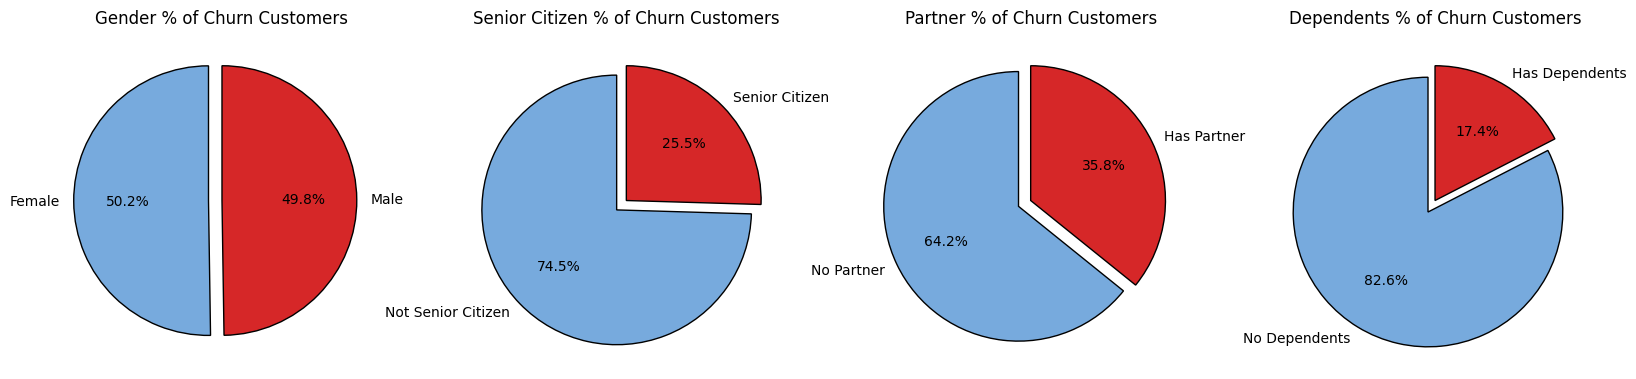

In [16]:
gender=df[df['Churn']==1]['gender'].value_counts()
gender=[gender[0]/sum(gender)*100,gender[1]/sum(gender)*100]

senior=df[df['Churn']==1]['SeniorCitizen'].value_counts()
senior=[senior[0]/sum(senior)*100,senior[1]/sum(senior)*100]

partner=df[df['Churn']==1]['Partner'].value_counts()
partner=[partner[0]/sum(partner)*100,partner[1]/sum(partner)*100]

dependents=df[df['Churn']==1]['Dependents'].value_counts()
dependents=[dependents[0]/sum(dependents)*100,dependents[1]/sum(dependents)*100]

fig=plt.subplots(nrows = 1,ncols = 4,figsize = (20,10))
plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender % of Churn Customers')    
plt.subplot(1,4,2)
plt.pie(senior,labels = ['Not Senior Citizen','Senior Citizen'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Senior Citizen % of Churn Customers')    
plt.subplot(1,4,3)
plt.pie(partner,labels = ['No Partner','Has Partner'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner % of Churn Customers')    
plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No Dependents','Has Dependents'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents % of Churn Customers')    
plt.show()

1. We observe that nearly 50 percent of both males and females churned.
2. 75% of churned customers are not senior citizens!!!!
3. Customers living by themselves have cutoff services as shown by partner and dependents plots.

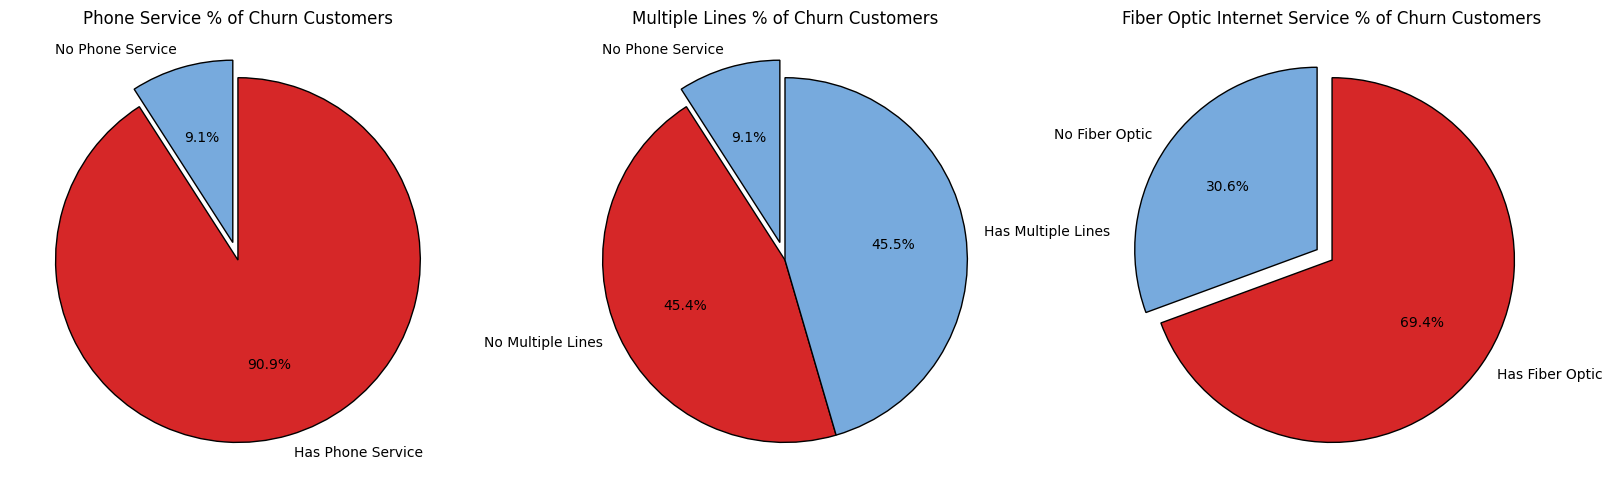

In [17]:
phoneservice=df[df['Churn']==1]['PhoneService'].value_counts()
phoneservice=[phoneservice[0]/sum(phoneservice)*100,phoneservice[1]/sum(phoneservice)*100]

multiplelines=df[df['Churn']==1]['MultipleLines'].value_counts()
multiplelines=[multiplelines[0]/sum(multiplelines)*100,multiplelines[1]/sum(multiplelines)*100,multiplelines[2]/sum(multiplelines)*100]

internetservice=df[df['Churn']==1]['InternetService_Fiber optic'].value_counts()
internetservice=[internetservice[0]/sum(internetservice)*100,internetservice[1]/sum(internetservice)*100]

fig=plt.subplots(nrows = 1,ncols = 3,figsize = (20,10))
plt.subplot(1,3,1)
plt.pie(phoneservice,labels = ['No Phone Service','Has Phone Service'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone Service % of Churn Customers')    
plt.subplot(1,3,2)
plt.pie(multiplelines,labels = ['No Phone Service','No Multiple Lines','Has Multiple Lines'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors =colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Multiple Lines % of Churn Customers')    
plt.subplot(1,3,3)
plt.pie(internetservice,labels = ['No Fiber Optic','Has Fiber Optic'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Fiber Optic Internet Service % of Churn Customers')    
plt.show()

1. Despite providing PhoneService, a high percentage of customers have switched!
2. Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
3. Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!

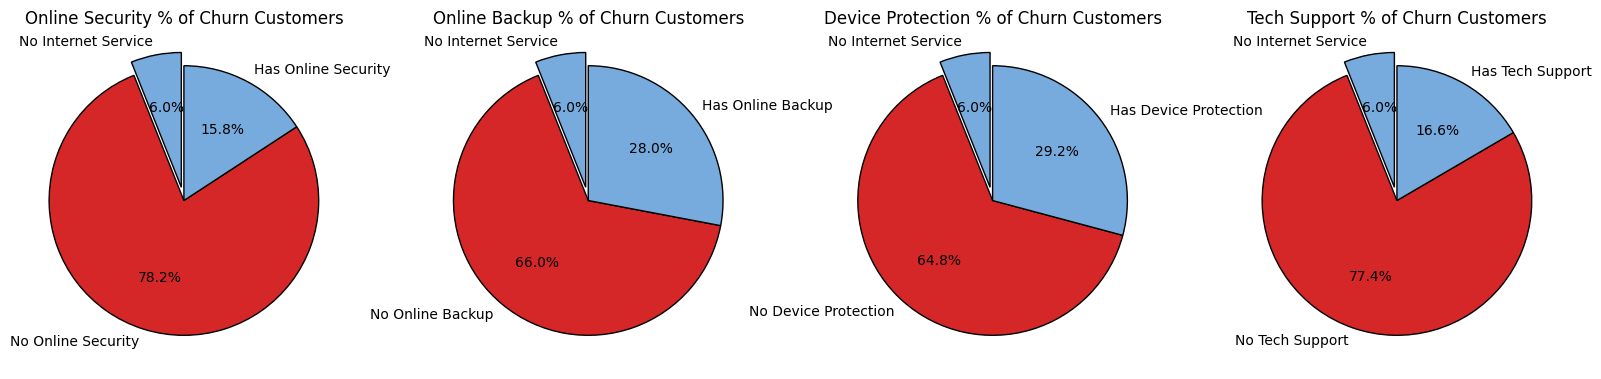

In [18]:
onlinesecurity=df[df['Churn']==1]['OnlineSecurity'].value_counts()
onlinesecurity=[onlinesecurity[0]/sum(onlinesecurity)*100,onlinesecurity[1]/sum(onlinesecurity)*100,onlinesecurity[2]/sum(onlinesecurity)*100]  

onlinebackup=df[df['Churn']==1]['OnlineBackup'].value_counts()
onlinebackup=[onlinebackup[0]/sum(onlinebackup)*100,onlinebackup[1]/sum(onlinebackup)*100,onlinebackup[2]/sum(onlinebackup)*100]

deviceprotection=df[df['Churn']==1]['DeviceProtection'].value_counts()
deviceprotection=[deviceprotection[0]/sum(deviceprotection)*100,deviceprotection[1]/sum(deviceprotection)*100,deviceprotection[2]/sum(deviceprotection)*100]

techsupport=df[df['Churn']==1]['TechSupport'].value_counts()
techsupport=[techsupport[0]/sum(techsupport)*100,techsupport[1]/sum(techsupport)*100,techsupport[2]/sum(techsupport)*100]

fig=plt.subplots(nrows = 1,ncols = 4,figsize = (20,10))
plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No Internet Service','No Online Security','Has Online Security'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Online Security % of Churn Customers')    
plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No Internet Service','No Online Backup','Has Online Backup'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Online Backup % of Churn Customers')    
plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No Internet Service','No Device Protection','Has Device Protection'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Device Protection % of Churn Customers')
plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No Internet Service','No Tech Support','Has Tech Support'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Tech Support % of Churn Customers')        
plt.show()

Above pie charts show significance of providing online security, onine backup, device protection and tech support as absence of these services leads to an average of 71.6% customers being churned off.

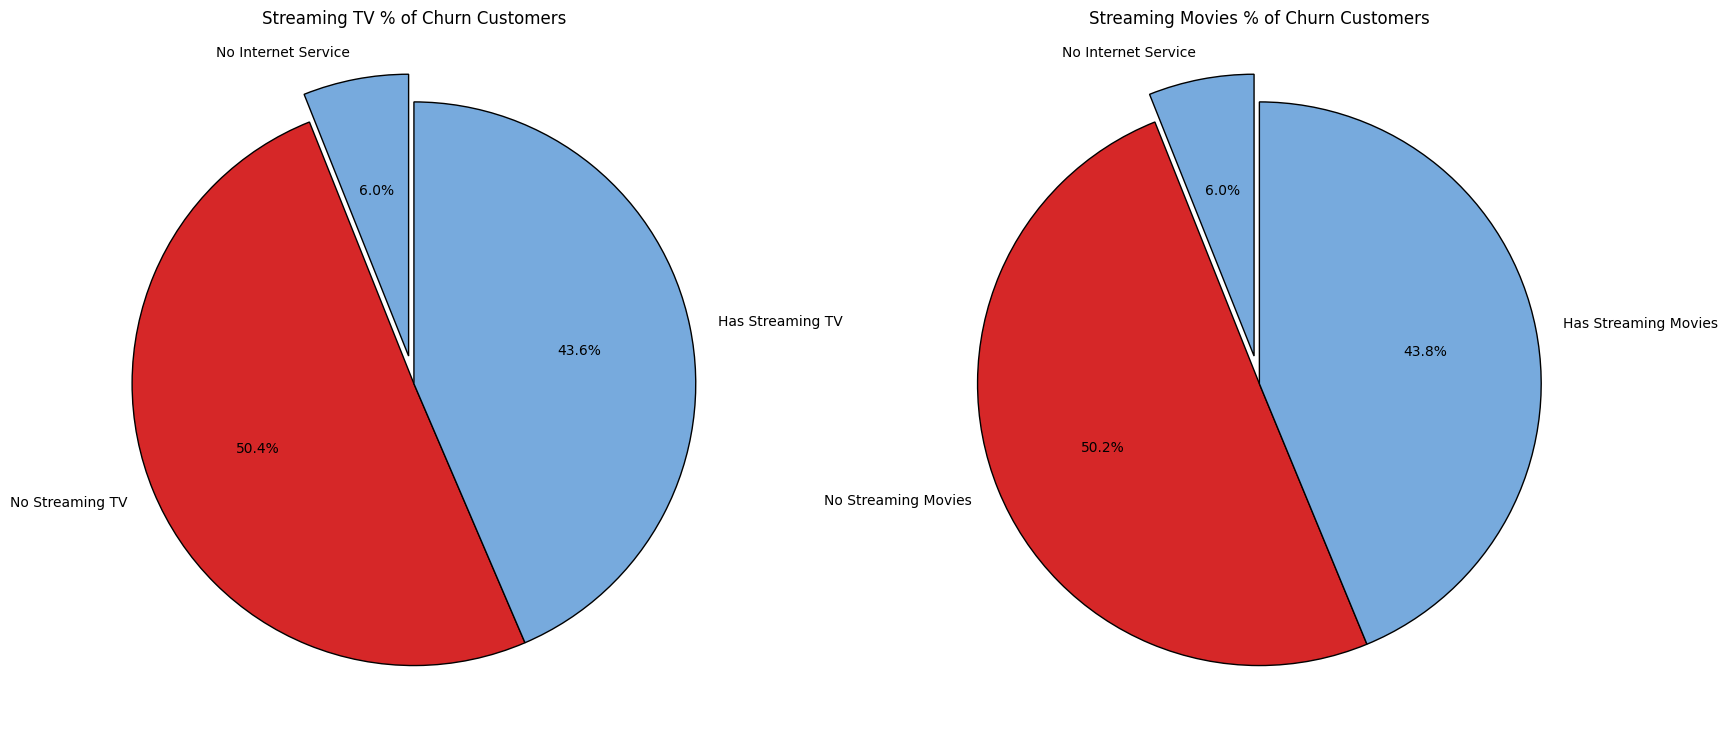

In [19]:
streamingtv=df[df['Churn']==1]['StreamingTV'].value_counts()
streamingtv=[streamingtv[0]/sum(streamingtv)*100,streamingtv[1]/sum(streamingtv)*100,streamingtv[2]/sum(streamingtv)*100]

streamingmovies=df[df['Churn']==1]['StreamingMovies'].value_counts()
streamingmovies=[streamingmovies[0]/sum(streamingmovies)*100,streamingmovies[1]/sum(streamingmovies)*100,streamingmovies[2]/sum(streamingmovies)*100]   

fig=plt.subplots(nrows = 1,ncols = 2,figsize = (20,10))
plt.subplot(1,2,1)
plt.pie(streamingtv,labels = ['No Internet Service','No Streaming TV','Has Streaming TV'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming TV % of Churn Customers')    
plt.subplot(1,2,2)
plt.pie(streamingmovies,labels = ['No Internet Service','No Streaming Movies','Has Streaming Movies'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming Movies % of Churn Customers')    
plt.show()

For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content

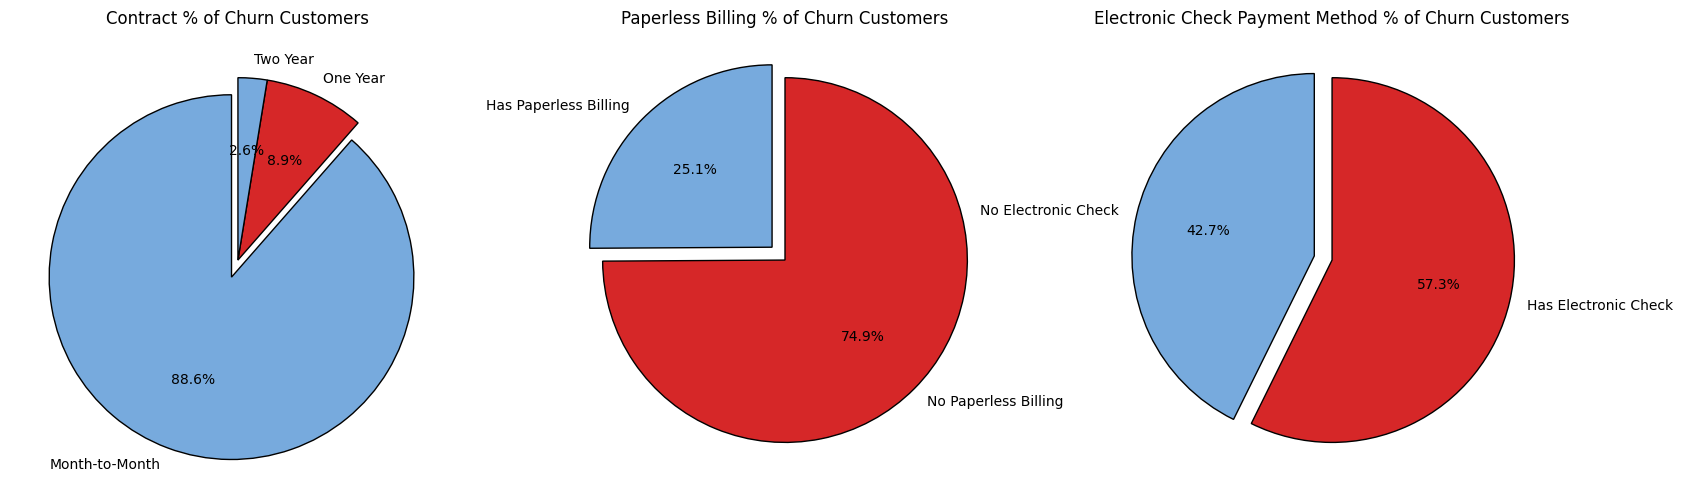

In [20]:
contract=df[df['Churn']==1]['Contract'].value_counts()
contract=[contract[0]/sum(contract)*100,contract[1]/sum(contract)*100,contract[2]/sum(contract)*100]   

paperlessbilling=df[df['Churn']==1]['PaperlessBilling'].value_counts()
paperlessbilling=[paperlessbilling[0]/sum(paperlessbilling)*100,paperlessbilling[1]/sum(paperlessbilling)*100]

paymentmethod=df[df['Churn']==1]['PaymentMethod_Electronic check'].value_counts()
paymentmethod=[paymentmethod[0]/sum(paymentmethod)*100,paymentmethod[1]/sum(paymentmethod)*100]

fig=plt.subplots(nrows = 1,ncols = 3,figsize = (20,10))
plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-Month','One Year','Two Year'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract % of Churn Customers')    
plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['Has Paperless Billing','No Paperless Billing'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless Billing % of Churn Customers')    
plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['No Electronic Check','Has Electronic Check'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Electronic Check Payment Method % of Churn Customers')    
plt.show()

1. Month-to-month contract duration had dominated the share of customers being churned off by 88.6% share among all other contracts!!
2. Paperless billing does not seemed to be appreciated by customers.
3. Similialy electronic check also seems to be a headache for majority of customers.

**Distribution of Numerical Features**

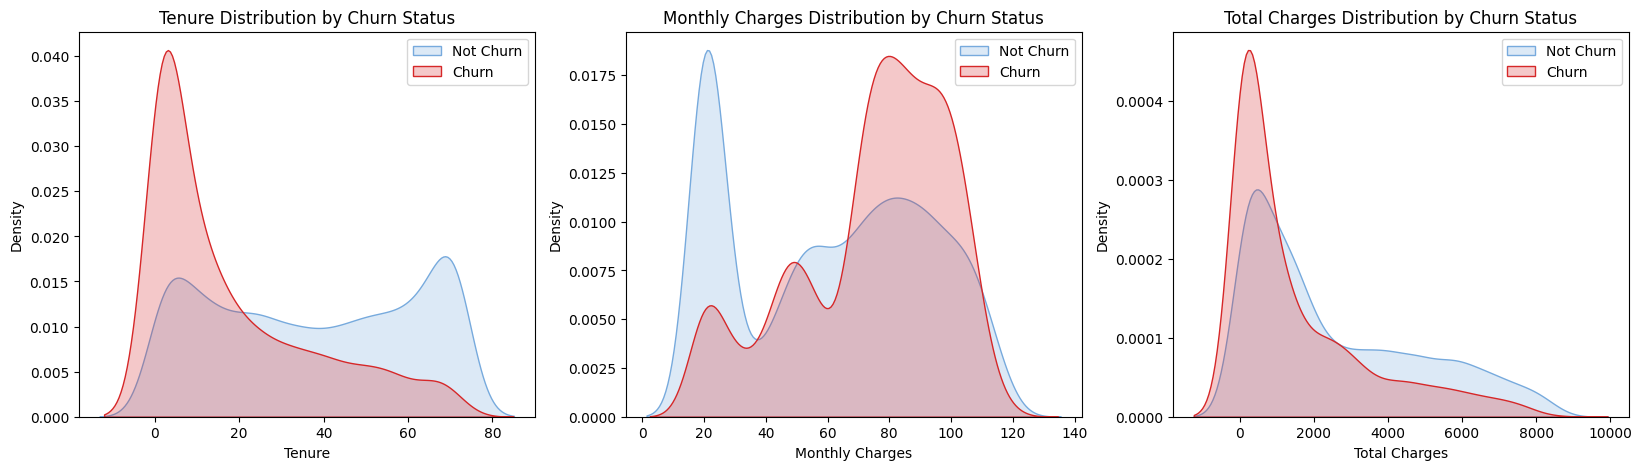

In [21]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig=plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
plt.subplot(1,3,1)
sns.kdeplot(x=df[df['Churn']==0]['tenure'], fill=True, ax=plt.gca(), color='#77aadd', label='Not Churn')
sns.kdeplot(x=df[df['Churn']==1]['tenure'], fill=True, ax=plt.gca(), color='#d62728', label='Churn')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.subplot(1,3,2)
sns.kdeplot(x=df[df['Churn']==0]['MonthlyCharges'], fill=True, ax=plt.gca(), color='#77aadd', label='Not Churn')
sns.kdeplot(x=df[df['Churn']==1]['MonthlyCharges'], fill=True, ax=plt.gca(), color='#d62728', label='Churn')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.subplot(1,3,3)
sns.kdeplot(x=df[df['Churn']==0]['TotalCharges'], fill=True, ax=plt.gca(), color='#77aadd', label='Not Churn')
sns.kdeplot(x=df[df['Churn']==1]['TotalCharges'], fill=True, ax=plt.gca(), color='#d62728', label='Churn')
plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

tenure and MonthlyCharges are kind of a bimodal distribution and TotalCharges displays a right skewed distribution
1. tenure distribution results in low customer churning as the tenure increases. It displays a symmetrical graph with the left side dominating with churn numbers and right side dominating with low churn numbers.
2. Upon increasing monthly charges, rate of customers churning also increases.
3. Since TotalCharges is a product of tenure and MonthlyCharges so it is following different pattern as compared to monthly charges that is lower total charges leads to more churning which is due to more impact of tenure here.

**Numerical v/s categorical features w.r.t Target variable**

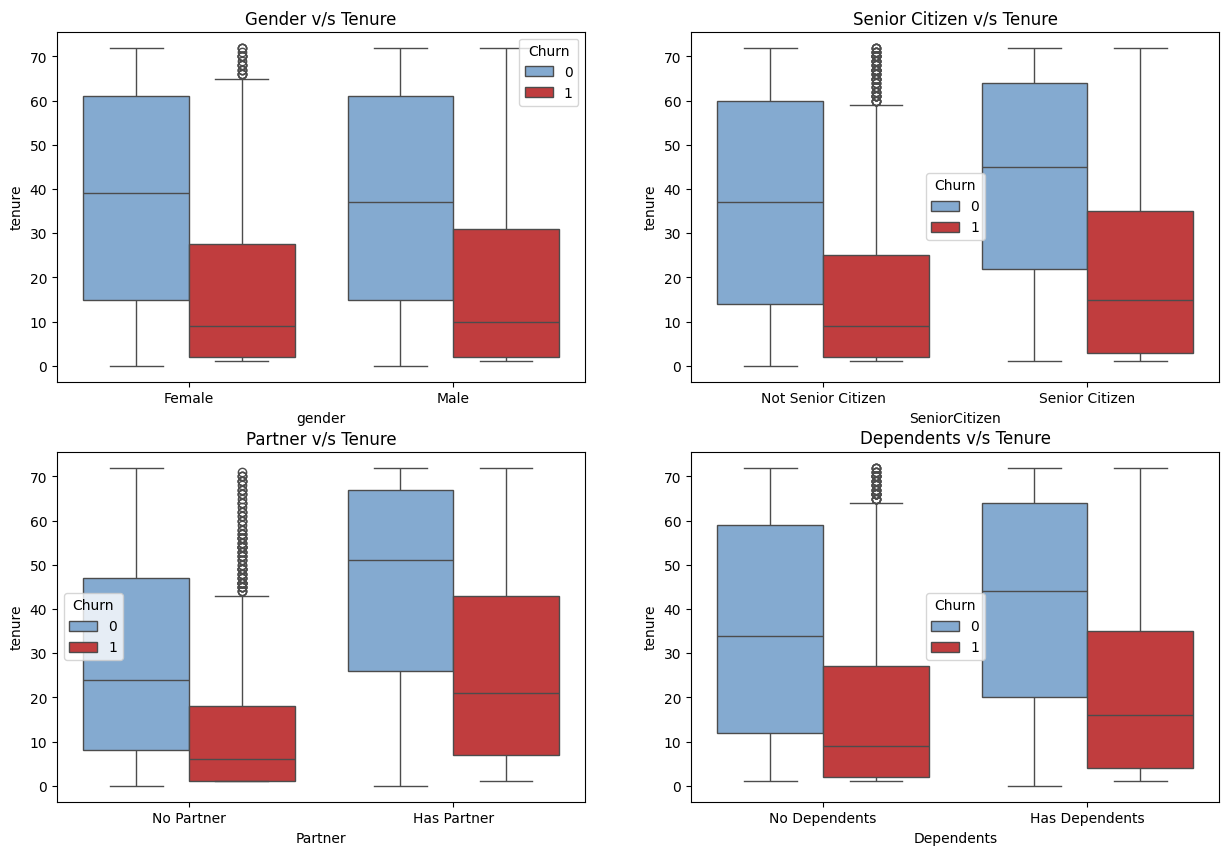

In [22]:
fig=plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x='gender',y='tenure',hue='Churn',data = df,palette=colors)
plt.title('Gender v/s Tenure')
plt.xticks([0,1],['Female','Male'])
plt.subplot(2,2,2)
sns.boxplot(x='SeniorCitizen',y='tenure',hue='Churn',data = df,palette=colors)
plt.title('Senior Citizen v/s Tenure')
plt.xticks([0,1],['Not Senior Citizen','Senior Citizen'])
plt.subplot(2,2,3)
sns.boxplot(x='Partner',y='tenure',hue='Churn',data = df,palette=colors)
plt.title('Partner v/s Tenure')
plt.xticks([0,1],['No Partner','Has Partner'])
plt.subplot(2,2,4)
sns.boxplot(x='Dependents',y='tenure',hue='Churn',data = df,palette=colors)
plt.title('Dependents v/s Tenure')
plt.xticks([0,1],['No Dependents','Has Dependents'])
plt.show()

1. Male and female churn plots are identical.
2. Senior citizens opted out from the services for a tenure values of 0 - 35 months.
3. Customers with partner churned within 5-45 months.

**Summary of EDA**

Order of features for Churn cases:
Categorical Features(Order):

1. gender : Male = Female
2. SeniorCitizen : No SeniorCitizen > SeniorCitizen
3. Partner : No Partner > Partner
4. Dependents : No Dependent > Dependent
5. PhoneService : PhoneService > No PhoneService
6. MultipleLines : MultipleLines > No MultipleLines > No PhoneService
7. InternetService : Fiber Optic > DSL > No InternetService
8. OnlineSecurity : Absent > Present > No InternetService
9. OnlineBackup : Absent > Present > No InternetService
10. DeviceProtection : Absent > Present > No InternetService
11. TechSupport : Absent > Present > No InternetService
12. StreamingTV : Absent > Present > No InternetService
13. StreamingMovies : Absent > Present > No InternetService
14. Contract : Month-to-Month > One year > Two year
15. PaperlessBilling : Present > Absent
16. PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!

Numerical Features(Range):
1. tenure : 1 - 5 months
2. MonthlyCharges : 65 - 105
3. TotalCharges : 0 - 1000


**Modelling**

As all numerical features already followed normal distribution so standardization is of no use and we should go with MinMax scaling!!!

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0    0.01             0   
1       1              0        0           0    0.47             1   
2       1              0        0           0    0.03             1   
3       1              0        0           0    0.62             0   
4       0              0        0           0    0.03             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               1             2                 1  ...   
1              1               2             1                 2  ...   
2              1               2             2                 1  ...   
3              0               2             1                 2  ...   
4              1               1             1                 1  ...   

   Contract  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0         0                 1            0.12          0.00      0   
1         1                 0            0.39          0.22      0   
2         0                 1            0.35          0.01      1   
3         1                 0            0.24          0.21      0   
4         0                 1            0.52          0.02      1   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 23 columns]

In [24]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

1. Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rfc=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[927 108]
 [191 183]]
0.7877927608232789


2. SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(x_train,y_train)
rfc.fit(x_res,y_res)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409

[[839 196]
 [131 243]]
0.7679205110007097


3. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[750 285]
 [ 81 293]]
0.7402413058907026


In [28]:
logreg.fit(x_res,y_res)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409

[[776 259]
 [ 93 281]]
0.7501774308019872


3. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.53      0.53      0.53       374

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409

[[855 180]
 [174 200]]
0.7487579843860894


In [30]:
knn.fit(x_res,y_res)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1035
           1       0.46      0.71      0.56       374

    accuracy                           0.70      1409
   macro avg       0.66      0.70      0.67      1409
weighted avg       0.76      0.70      0.72      1409

[[723 312]
 [109 265]]
0.7012065294535131


4. SVC

In [31]:
from sklearn.svm import SVC
svc=SVC(class_weight='balanced', random_state=42)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[751 284]
 [ 82 292]]
0.7402413058907026


In [32]:
svc.fit(x_res,y_res)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

[[789 246]
 [ 95 279]]
0.7579843860894251


5. XGBoost Classifier

In [33]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight= (y_train==0).sum() / (y_train==1).sum())
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.53      0.67      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.76      1409

[[817 218]
 [125 249]]
0.7565649396735273


In [34]:
xgb.fit(x_res,y_res)
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.50      0.75      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409

[[748 287]
 [ 92 282]]
0.7310149041873669


6. LightGBM

In [35]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(random_state=42,is_unbalance=True)
lgbm.fit(x_train,y_train)
y_pred=lgbm.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.52      0.74      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409

[[783 252]
 [ 96 278]]
0.75301632363378

In [36]:
lgbm.fit(x_res,y_res)
y_pred=lgbm.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

[[819 216]
 [109 265]]
0.7693399574166075


7. Voting CLF

In [37]:
from sklearn.ensemble import VotingClassifier

# Define base models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
        ('lr', LogisticRegression(class_weight='balanced', random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight= (y_train==0).sum() / (y_train==1).sum())),
    ],
    voting='soft'
)

# Fit on training data
voting_clf.fit(x_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.55      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

[[832 203]
 [123 251]]
0.7686302342086586


**Fine Tuning**

In [60]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

lgbm = LGBMClassifier(is_unbalance=True, random_state=42)
grid = GridSearchCV(lgbm, param_grid, scoring='f1', cv=5, n_jobs=1)
grid.fit(x_res, y_res)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# lgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 810
[LightGBM] [I

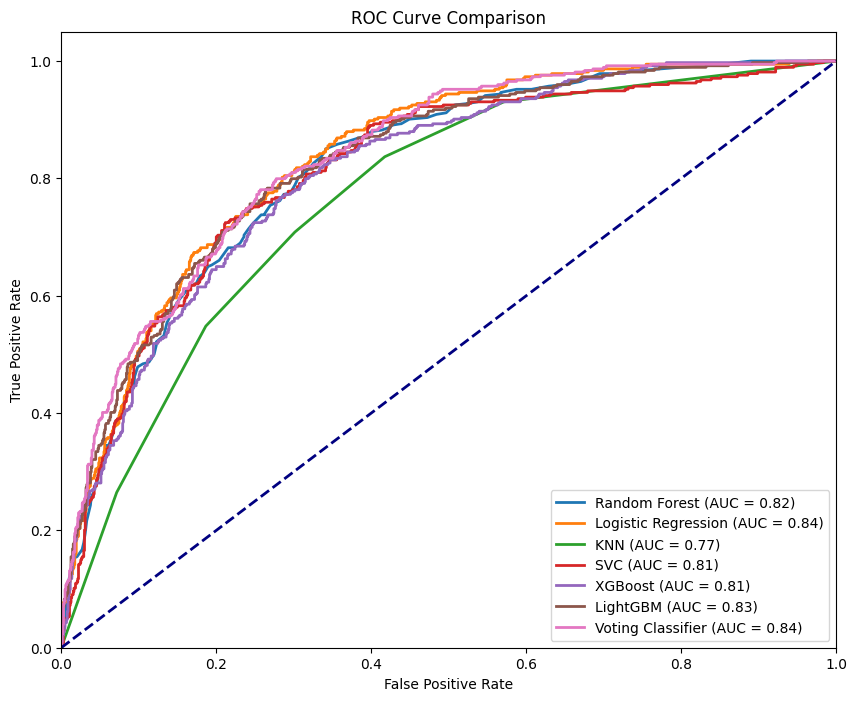

In [38]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

models = {
    "Random Forest": rfc,
    "Logistic Regression": logreg,
    "KNN": knn,
    "SVC": svc,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "Voting Classifier": voting_clf
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(x_test)[:, 1]
    else:
        # For SVC with probability=False, use decision_function
        y_score = model.decision_function(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

Therefore, My final model will be Voting Classifier!!!